In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
%matplotlib inline

In [26]:
df= pd.read_csv('googleplaystore.csv')

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [29]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [30]:
#while preprocessing we observe that Rating column has max rating of 19.0 which doesnt seem correct, we find out the row for that rating
df[df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
#we shift all contents of the row where rating is 19.0
df.iloc[10472,1:] = df.iloc[10472,1:].shift(1)
df[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [32]:
#check missing values
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [33]:
#print shape of dataset
df.shape

(10841, 13)

In [34]:
#drop rows with na values
df.dropna(inplace=True)

In [35]:
print('Number of rows after deleting: ', df.shape[0])

Number of rows after deleting:  9360


In [36]:
#add new columns to split Last updated column
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df['year_added']=df['Last Updated'].dt.year
df['month_added']=df['Last Updated'].dt.month

In [37]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [38]:
#print columns name
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [39]:
#one hot encode categorical variables
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df=pd.concat(frames,axis=1)
df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [40]:
#drop columns because we need to make prediction of rating and these dont add value for making predictions
df.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [41]:
df.head(2)

,Rating,Reviews,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
df.corr()

,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
year_added,1.000000,-0.171858,0.030116,0.020819,-0.029666,0.005304,0.025486,0.007474,0.061135,0.009018,...,-0.072173,0.039814,-0.018871,-0.000559,-0.173394,-0.066728,0.022698,0.055238,0.034088,-0.050842
month_added,-0.171858,1.000000,0.003877,-0.006996,-0.010426,-0.014661,0.010195,0.006431,0.016957,0.036689,...,-0.015891,0.009672,0.018624,0.008170,-0.012523,-0.032378,-0.008750,0.013512,0.037675,-0.018342
catg_AUTO_AND_VEHICLES,0.030116,0.003877,1.000000,-0.005952,-0.012344,-0.016216,-0.007001,-0.016895,-0.012932,-0.011505,...,-0.025843,-0.013946,-0.011692,-0.007968,-0.019325,0.039437,-0.012633,-0.020179,-0.028292,-0.000916
catg_BEAUTY,0.020819,-0.006996,-0.005952,1.000000,-0.009348,-0.012280,-0.005301,-0.012794,-0.009793,-0.008712,...,-0.019570,-0.010561,-0.008854,-0.006034,-0.018265,0.022579,-0.014130,-0.007894,-0.014307,-0.000694
catg_BOOKS_AND_REFERENCE,-0.029666,-0.010426,-0.012344,-0.009348,1.000000,-0.025467,-0.010994,-0.026533,-0.020309,-0.018067,...,-0.040585,-0.021901,-0.018361,-0.012514,-0.013174,0.017362,-0.009896,-0.020846,-0.001502,-0.001439
catg_BUSINESS,0.005304,-0.014661,-0.016216,-0.012280,-0.025467,1.000000,-0.014443,-0.034856,-0.026680,-0.023735,...,-0.053315,-0.028771,-0.024121,-0.016439,-0.023545,0.087757,-0.038494,-0.041630,-0.058651,-0.001891
catg_COMICS,0.025486,0.010195,-0.007001,-0.005301,-0.010994,-0.014443,1.000000,-0.015048,-0.011518,-0.010247,...,-0.023017,-0.012421,-0.010413,-0.007097,-0.021482,-0.070256,-0.003108,0.026068,0.065021,-0.000816
catg_COMMUNICATION,0.007474,0.006431,-0.016895,-0.012794,-0.026533,-0.034856,-0.015048,1.000000,-0.027797,-0.024729,...,-0.055548,-0.029976,-0.025131,-0.017127,-0.001382,0.050386,-0.040106,-0.019210,-0.025394,-0.001970
catg_DATING,0.061135,0.016957,-0.012932,-0.009793,-0.020309,-0.026680,-0.011518,-0.027797,1.000000,-0.018928,...,-0.042518,-0.022944,-0.019236,-0.013110,-0.027870,-0.266279,-0.030699,0.585563,-0.038765,-0.001508
catg_EDUCATION,0.009018,0.036689,-0.011505,-0.008712,-0.018067,-0.023735,-0.010247,-0.024729,-0.018928,1.000000,...,-0.037825,-0.020412,-0.017113,-0.011663,-0.022082,0.041725,0.005923,-0.017928,-0.044347,-0.001341


In [42]:
#convert rating column to int, so that we can consider it as a classification model.
X= df.drop('Rating', axis=1)
y= df['Rating'].values
y= y.astype('int')


In [178]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [179]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [180]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0, solver='lbfgs',max_iter=400 )
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy of Logistic Regression Model: ', lr_ac)


Accuracy of Logistic Regression Model:  0.7622863247863247


Confusion Matrix for Logistic Regression Classifier 



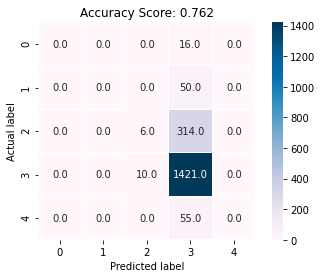

In [181]:
#Confusion matrix for logistic regression model
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [182]:
svc_r=SVC(kernel='rbf', random_state=0, probability=True)
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_ac=accuracy_score(y_test, svr_pred)
pred_prob1 = svc_r.predict_proba(X_test)
print('Accuracy of SVM Model: ', svr_ac)



Accuracy of SVM Model:  0.7649572649572649


Confusion Matrix for SVM 



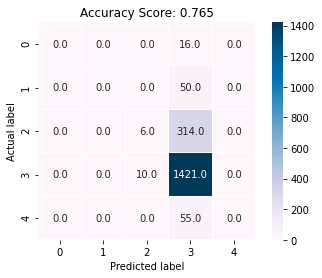

In [183]:
#Confusion matrix for SVM
print("Confusion Matrix for SVM","\n")
score = round(accuracy_score(y_test, svr_pred),3) 
cm2 = confusion_matrix(y_test, svr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [184]:
#Random Forest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_ac=accuracy_score(y_test, rdf_pred)
print('Accuracy of Random Forest: ', rdf_ac)

Accuracy of Random Forest:  0.7355769230769231


Confusion Matrix for Random Forest Classifier 



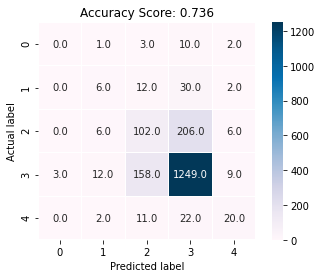

In [185]:
#Confusion matrix for Random Forest
print("Confusion Matrix for Random Forest Classifier","\n")
score = round(accuracy_score(y_test, rdf_pred),3) 
cm1 = confusion_matrix(y_test, rdf_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


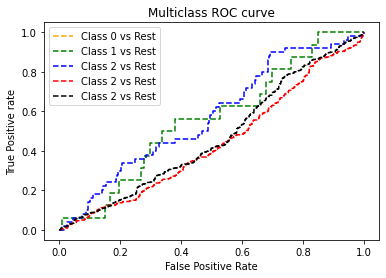

In [186]:
#plot of roc auc curve for SVM
from sklearn.metrics import roc_curve
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob1[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [187]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [188]:
from sklearn.preprocessing import LabelBinarizer
multiclass_roc_auc_score(y_test, svr_pred)

0.5007015817495383

Text(0.5, 1.0, 'Model Accuracy')

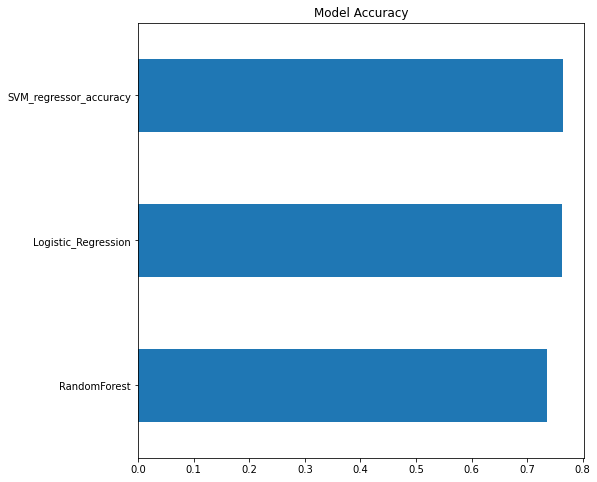

In [189]:
#Plot of accuracy of all models
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')